# Midterm1 - Part B

## General Instructions

Worth 80 points

Exam 1 is broken down into two parts:

* Part A: (Synchronous) Multiple Choice Questions (MCQs) - 20% of the score - This in-class quiz will unlock on Feb 22nd from 3:30 to 4:05 pm.
* Part B: (Asynchronous) Theoretical Questions & Coding - 80% of the score - This take-home exam will unlock on Feb 22nd from 4.05 to Feb 23rd at 7.00 pm.

This exam is open resources but **Individual**.

* You may use any course materials (slides, textbooks, etc.).
* You may not be able to consult with other humans. DO NOT RISK THIS.
* You may not use any kind of AI Chatbots for assistance - this will be checked.


**Exam 1: Part B**

This is a take-home Exam. It will unlock on Thursday, February 22nd at 4:05 PM MST and will be due on Friday, February 23rd at 7:00 PM MST. The part is out of a total of 80 Points. Please adhere to the below-mentioned instructions:

* Use this Jupyter Notebook template to complete your Part B.
* Submit one PDF file per question.
* Add your code (Jupyter Notebook file) and CSV File is apply.
* Datasets For QB2 and B3 must to be downlaoded from Canvas. For your information(FYI): Canvas cannot preview .csv, zip, or .xlsx files.

  * B.2: covid-19_datasets.zip
  * B.3: MidTerm1_PartB3_Data.xlsx,   MidTerm1_PartB3_Data.csv


Late Submission Policy: *Late Submissions are accepted until 8:59 pm, but they will be penalized with 15 points.*

---
For this question, follow the below mentioned instructions clearly:

* Make an HTTP GET request to the Course Catalog website (https://catalog.colorado.edu/courses-a-z/)
* Use webscraping to parse the HTML content.
* First, get a list of all the departments in the catalog. Retrieve course code for each department and convert it into lowercase for further use.
* Next, use the department code to access the list of courses offered by that department. For example, use https://catalog.colorado.edu/courses-a-z/appm/ to access the course list of Applied Mathematics department and so on. Do this for all the departments.
* After accessing the course list, locate and extracts data such as Course Name, Number of credits, Course Code, Requisites and Description.
* Finally, create a DataFrame from the extracted data, display it and save it a CSV file.
* Submit the CSV file when submitting the exam.
* <b> Note: We will deduct 5 points if you print the entire html output. If you want to show the output then print only a fraction of it.</b>

#### GUIDELINES:

* Use Python and a suitable web scraping library to extract data from the website.
* Navigate through the website's structure to locate and extract relevant information about courses.
* Pay attention to the HTML structure and tags containing the required data.
* You will have to iterate through the department code and request the course list to extract information.

In [1]:
## ADD REQUIRED IMPORTS ##
import requests
import re
import pandas as pd

from bs4 import BeautifulSoup

In [2]:
url = "https://catalog.colorado.edu/courses-a-z/"
url_websites = requests.get(url)

In [3]:
url_html_code = BeautifulSoup(url_websites.content, "html.parser")

In [4]:
url_html_code_string = str(url_html_code)
url_html_code_string = url_html_code_string.replace("'","\'")

In [5]:
departments = url_html_code.find_all('a', href=True)  # Find all <a> tags with href attribute
department_codes = [link['href'].split('/')[-2] for link in departments if '/courses-a-z/' in link['href']]
department_codes = [code.lower() for code in department_codes]  # Convert to lowercase


In [6]:
departments_container = url_html_code.find('div', id="atozindex")  # Example class, replace with actual class if different
department_links = departments_container.find_all('a', href=True)

department = [(link.get_text())for link in department_links]
department_codes = [link['href'].split('/')[-2] for link in department_links]
department_codes = [code.lower() for code in department_codes]  # Convert to lowercase




In [7]:
## GET DEPARTMENT LIST AND DISPLAY IT ##
print("Department name with department code :", department)

Department name with department code : ['Accounting (ACCT)', 'Advertising, PR and Media Design (APRD)', 'Aerospace Engineering (ASEN)', 'Air Force Aerospace Studies - ROTC (AIRR)', 'Anthropology (ANTH)', 'Applied Math (APPM)', 'Arabic Languages (ARAB)', 'Architectural Engineering (AREN)', 'Architecture (ARCH)', 'Art Film Studies (ARTF)', 'Art History (ARTH)', 'Arts and Sciences Courses (ARSC)', 'Art Studio and Non-Studio (ARTS)', 'Asian Studies (ASIA)', 'Astrophysical and Planetary Sciences (ASTR)', 'ATLAS (ATLS)', 'Atmospheric and Oceanic Sciences (ATOC)', 'Baker Residential Academic Program (BAKR)', 'BCOR Applied Semester Experience (BASE)', 'Biochemistry (BCHM)', 'Biomedical Engineering (BMEN)', 'Business Administration (BADM)', 'Business Core (BCOR)', 'Business Environment and Policy (BPOL)', 'Business Law (BSLW)', 'Business Minor (BUSM)', 'Career Services (CSVC)', 'Center for Western Civilization (CWCV)', 'Center of the American West (CAMW)', 'Central and East European Studies (CE

In [8]:
## ITERATE THROUGH DEPARTMENT LIST AND RETRIEVE COURSE INFORMATION FOR EACH DEPARTMENT ##

courses_data = pd.DataFrame()

for codes in department_codes:
    dept_url = f'https://catalog.colorado.edu/courses-a-z/{codes}/'
    dept_response = requests.get(dept_url)
    dept_soup = BeautifulSoup(dept_response.content, 'html.parser')

    # Locate course blocks and extract details (adjust selectors based on actual HTML structure)
    course_details = dept_soup.find('div', class_="page_content")  # Example class
    
    course_tag = course_details.find_all('p', class_='courseblocktitle')

    title = []
    for a in course_tag:
        title.append(a.strong.text.strip()) if a else 'Title not found'

    course_names = [course.split(')')[-1].replace('\xa0', ' ').strip() for course in title]

    pattern_1 = r'\(.*?\)'
    pattern = r'\(\d{1,2}(\.\d+)?(-\d{1,2}(\.\d+)?)?\)'
    # Extract numbers inside parentheses
    credits = []
    for s in title:
        matches = re.findall(pattern_1, s)
        credits.extend(matches)  # 'extend' is used to add all found numbers to the list
    filtered_credits_list = [item for item in credits if re.fullmatch(pattern, item)]


    course_code_1_tag = course_details.find_all('div', class_='courseblock')
    course_codes_1 = []
    for block in course_code_1_tag:
        # Extract 'data-coursecode' attribute from each block
        c = block.get('data-coursecode')
        if c:
            course_codes_1.append(c)
    course_codes_unique = list(dict.fromkeys(course_codes_1))
    #len(unique_list)

    description_tag = course_details.find_all('p', class_='courseblockdesc noindent')
    requisite_tag = course_details.find_all('p', class_='courseblockextra noindent')

    description = [tag.text for tag in description_tag]
    requisite = [tag.text for tag in requisite_tag]

    # Extract other details like credits, course code, requisites
    # Make sure we have the same number of titles, authors, and downloads
    # print(codes)
    # print('Length of: ', len(course_names))
    # print('Length of: ', len(course_codes_unique))
    # print('Length of: ', len(filtered_credits_list))
    # print('Length of: ', len(requisite))
    # print('Length of: ', len(description))
    assert len(course_names) == len(course_codes_unique) == len(filtered_credits_list) == len(requisite) == len(description), "Mismatched lengths of tags"


    temp_df = pd.DataFrame({
        'Course Title': course_names,
        'Course Code': course_codes_unique,
        'Number of Credits': filtered_credits_list,
        'Requisite': requisite,
        'Description': description
    })

    # Append the temporary DataFrame to the main DataFrame
    courses_data = pd.concat([courses_data, temp_df], ignore_index=True)
  



In [9]:
print(courses_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9001 entries, 0 to 9000
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Course Title       9001 non-null   object
 1   Course Code        9001 non-null   object
 2   Number of Credits  9001 non-null   object
 3   Requisite          9001 non-null   object
 4   Description        9001 non-null   object
dtypes: object(5)
memory usage: 351.7+ KB
None


In [10]:
courses_data.to_csv('Coursedata.csv')

## B2. Data Visualization: From epidemic to pandemic (25 points)



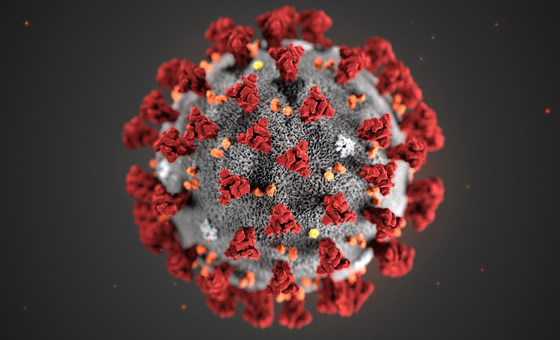



In December 2019, COVID-19 coronavirus was first identified in the Wuhan region of China. By March 11, 2020, the World Health Organization (WHO) categorized the COVID-19 outbreak as a pandemic. A lot has happened in the months in between with major outbreaks in Iran, South Korea, and Italy.

We know that COVID-19 spreads through respiratory droplets, such as through coughing, sneezing, or speaking. But, how quickly did the virus spread across the globe? And, can we see any effect from country-wide policies, like shutdowns and quarantines?

Fortunately, organizations around the world have been collecting data so that governments can monitor and learn from this pandemic. Notably, the Johns Hopkins University Center for Systems Science and Engineering created a [publicly available data repository](https://github.com/RamiKrispin/coronavirus) to consolidate this data from sources like the WHO, the Centers for Disease Control and Prevention (CDC), and the Ministry of Health from multiple countries. You can use this dataset as optional, however you must to use the dataset provided on Canvas.

In this notebook, you will visualize COVID-19 data from the first several weeks of the outbreak to see at what point this virus became a global pandemic.
Please note that information and data regarding COVID-19 is frequently being updated. The data used in this project was pulled on March 17, 2020, and should not be considered to be the most up to date data available.

In [11]:
# Your Code Here - Load libraries

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.dates as mdates

In [12]:
# Read Covid19_datasets/confirmed_cases_worldwide.csv into confirmed_cases_worldwide
df_confirmed_cases_worldwide = pd.read_csv("confirmed_cases_worldwide.csv")

### B2.1 Confirmed cases throughout the world


The table confirmed_cases_worldwide shows the cumulative confirmed cases of COVID-19 worldwide by date. Just reading numbers in a table makes it hard to get a sense of the scale and growth of the outbreak. Please draw a line plot to visualize the confirmed cases worldwide.

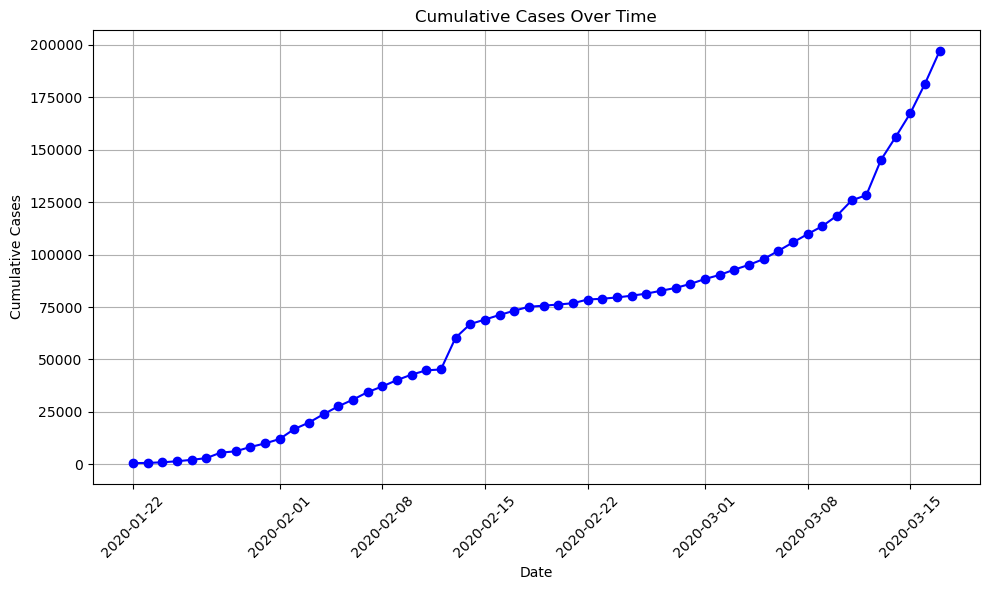

In [13]:
#You code here
# Convert 'date' column to datetime
df_confirmed_cases_worldwide['date'] = pd.to_datetime(df_confirmed_cases_worldwide['date'])

# Plotting
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the figure
plt.plot(df_confirmed_cases_worldwide['date'], df_confirmed_cases_worldwide['cum_cases'], marker='o', linestyle='-', color='b')
plt.title('Cumulative Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.grid(True)
plt.xticks(rotation=45)  # Rotates date labels to avoid overlap
plt.tight_layout()  # Adjusts subplot params for the plot to fit into the figure area

# Show plot
plt.show()

### B2.2 China compared to the rest of the world

The y-axis in that plot is pretty scary, with the total number of confirmed cases around the world approaching 200,000. Beyond that, some weird things are happening: there is an odd jump in mid February, then the rate of new cases slows down for a while, then speeds up again in March. We need to dig deeper to see what is happening.

Early on in the outbreak, the COVID-19 cases were primarily centered in China. Let's plot confirmed COVID-19 cases in China and the rest of the world separately to see if it gives us any insight.

We'll build on this plot in future tasks. One thing that will be important for the following tasks is that you add aesthetics within the line geometry of your ggplot, rather than making them global aesthetics.

In [14]:
# Read in Covid19_datasets/confirmed_cases_china_vs_world.csv in onfirmed_cases_china_vs_world
df_confirmed_cases_china_vs_world = pd.read_csv("confirmed_cases_china_vs_world.csv")


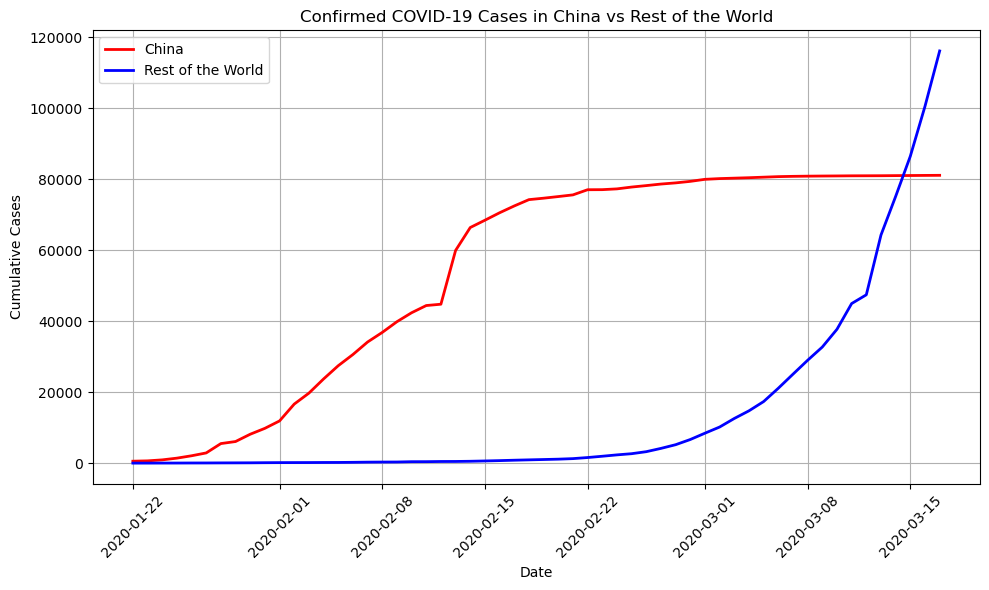

In [15]:
# Convert 'date' column to datetime format
df_confirmed_cases_china_vs_world['date'] = pd.to_datetime(df_confirmed_cases_china_vs_world['date'])

# Filter data for China and Not China
china_df = df_confirmed_cases_china_vs_world[df_confirmed_cases_china_vs_world['is_china'] == 'China']
not_china_df = df_confirmed_cases_china_vs_world[df_confirmed_cases_china_vs_world['is_china'] == 'Not China']

# Plotting
plt.figure(figsize=(10, 6))

# Plot for China
plt.plot(china_df['date'], china_df['cum_cases'], label='China', color='red', linewidth=2)

# Plot for the rest of the world
plt.plot(not_china_df['date'], not_china_df['cum_cases'], label='Rest of the World', color='blue', linewidth=2)

# Adding annotations and aesthetics
plt.title('Confirmed COVID-19 Cases in China vs Rest of the World')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


### B2.3 Add annotations to your plot!

In February, the majority of cases were in China. That changed in March when it really became a global outbreak: around March 14, the total number of cases outside China overtook the cases inside China. This was days after the WHO declared a pandemic.

There were a couple of other landmark events that happened during the outbreak. For example, the huge jump in the China line on February 13, 2020 wasn't just a bad day regarding the outbreak; China changed the way it reported figures on that day (CT scans were accepted as evidence for COVID-19, rather than only lab tests).

By annotating events like this, we can better interpret changes in the plot. Please customize this plot the add events(annotation mark) to the plot.

Refer to the dataset folder (zip file) available on Canvas to determine the necessary annotations.

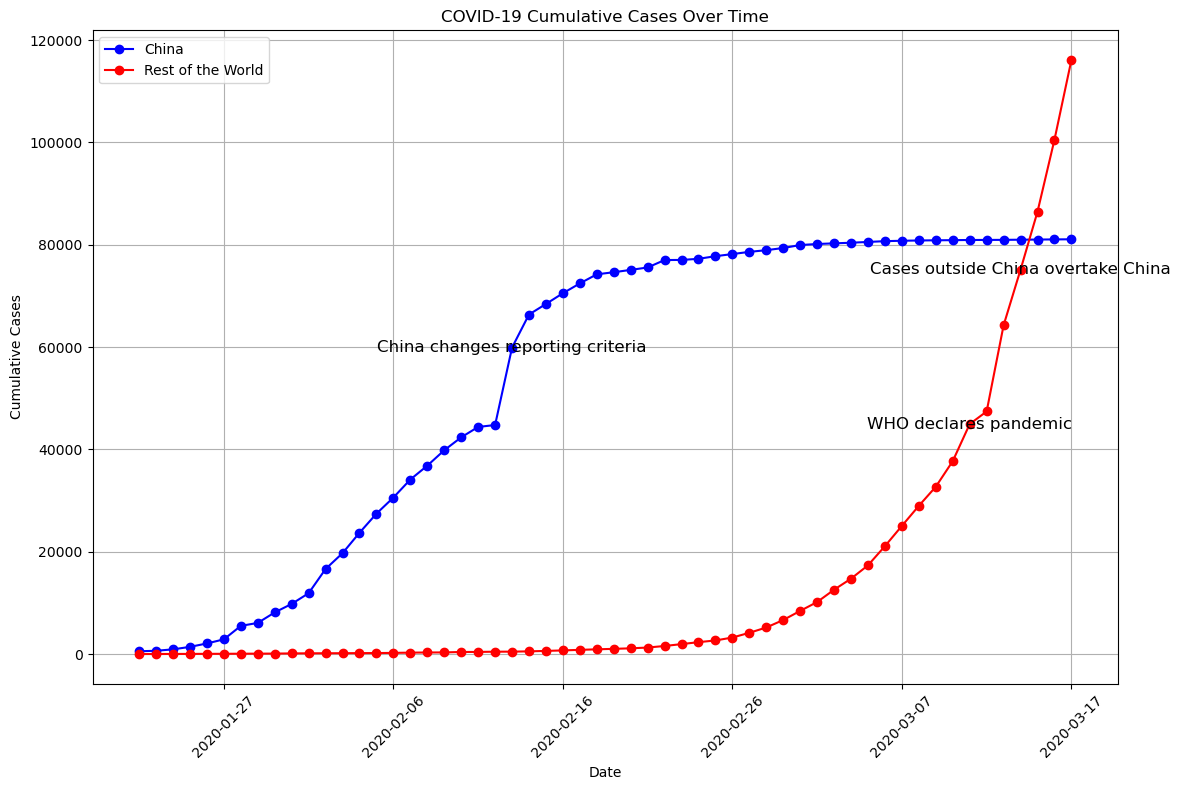

In [16]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(china_df['date'], china_df['cum_cases'], label='China', marker='o', linestyle='-', color='b')
ax.plot(not_china_df['date'], not_china_df['cum_cases'], label='Rest of the World', marker='o', linestyle='-', color='r')

# Annotation dates
who_declare_pandemic_date = pd.to_datetime('2020-03-11')
cases_overtake_date = pd.to_datetime('2020-03-14')
reporting_change_date = pd.to_datetime('2020-02-13')

# Adding annotations using ax.text()
if not_china_df['date'].isin([who_declare_pandemic_date]).any():
    ax.text(who_declare_pandemic_date, 
            not_china_df.loc[not_china_df['date'] == who_declare_pandemic_date, 'cum_cases'].values[0], 
            'WHO declares pandemic', fontsize=12, ha='center', va='center')

if not_china_df['date'].isin([cases_overtake_date]).any():
    ax.text(cases_overtake_date, 
            not_china_df.loc[not_china_df['date'] == cases_overtake_date, 'cum_cases'].values[0], 
            'Cases outside China overtake China', fontsize=12, ha='center', va='center')

if china_df['date'].isin([reporting_change_date]).any():
    ax.text(reporting_change_date, 
            china_df.loc[china_df['date'] == reporting_change_date, 'cum_cases'].values[0], 
            'China changes reporting criteria', fontsize=12, ha='center', va='center')

# Formatting the plot
ax.set_title('COVID-19 Cumulative Cases Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Cases')
ax.legend()
ax.grid(True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.setp(ax.get_xticklabels(), rotation=45)
fig.tight_layout()

# Show plot
plt.show()

### B2.4 Adding a trend line to China

When trying to assess how big future problems are going to be, we need a measure of how fast the number of cases is growing. A good starting point is to see if the cases are growing faster or slower than linearly.

There is a clear surge of cases around February 13, 2020, with the reporting change in China. However, a couple of days after, the growth of cases in China slows down. How can we describe COVID-19's growth in China after February 15, 2020?

#### Filter for China, from Feb 15:
To understand if the growth is faster or slower tahn linear we can look at the growth rate of the cases and compare it to a linear growth model. Few approaches followed are:
1. Calculating Daily growth

If the growth rate is decreasing over time, it might indicate that the growth is slower than linear, possibly due to effective containment measures or other factors.

In [17]:
china_df['daily_growth'] = china_df['cum_cases'].pct_change() * 100  # Percentage growth from the previous day
china_df_after_feb15 = china_df[china_df['date'] > '2020-02-15']


C:\Users\chira\AppData\Local\Temp\ipykernel_26580\393420019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_df['daily_growth'] = china_df['cum_cases'].pct_change() * 100  # Percentage growth from the previous day


2. Logarithmic Approach

Linear growth in a logarithmic scale will appear as a straight line, whereas exponential growth will appear as an upward curve, and slower-than-exponential (sub-exponential) growth will curve downwards.

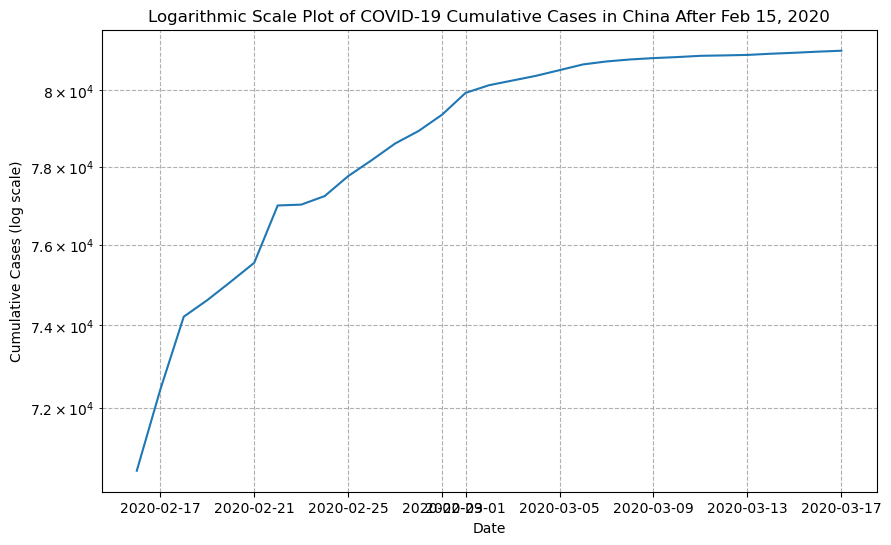

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(china_df_after_feb15['date'], china_df_after_feb15['cum_cases'])
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.title('Logarithmic Scale Plot of COVID-19 Cumulative Cases in China After Feb 15, 2020')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases (log scale)')
plt.grid(True, which="both", ls="--")
plt.show()


### B2.5 And the rest of the world?

From the plot above, the growth rate in China is slower than linear. That's great news because it indicates China has at least somewhat contained the virus in late February and early March.

How does the rest of the world compare to linear growth?

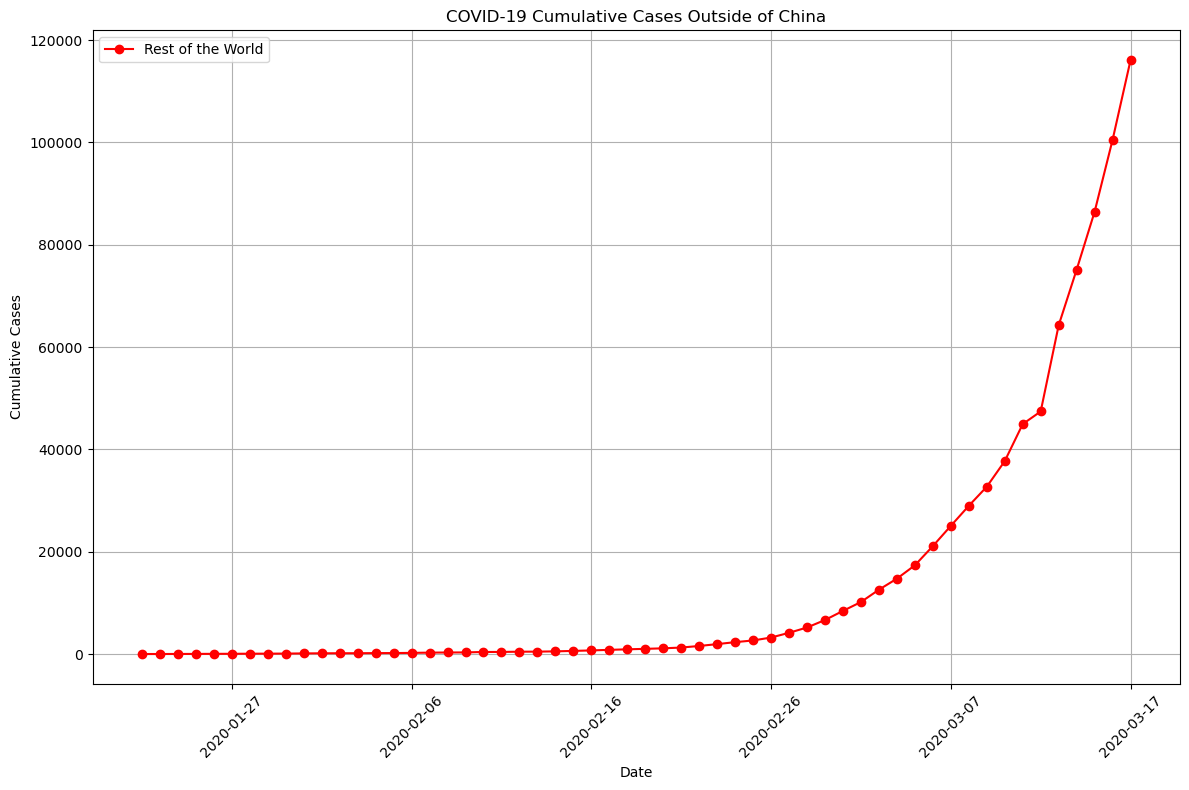

In [19]:
# Filter confirmed_cases_china_vs_world for not China
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(not_china_df['date'], not_china_df['cum_cases'], label='Rest of the World', marker='o', linestyle='-', color='r')

# Optional: Use a logarithmic scale to see if the growth is exponential
# plt.yscale('log')
ylabel_text = 'Cumulative Cases'
if plt.gca().get_yscale() == 'log':
    ylabel_text += ' (log scale)'

# Adding title and labels
plt.title('COVID-19 Cumulative Cases Outside of China')
plt.xlabel('Date')
plt.ylabel(ylabel_text)
plt.legend()
plt.grid(True)

# Formatting date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


### B2.6 Adding a logarithmic scale

From the plot above, we can see a straight line does not fit well at all, and the rest of the world is growing much faster than linearly. What if we added a logarithmic scale to the y-axis?

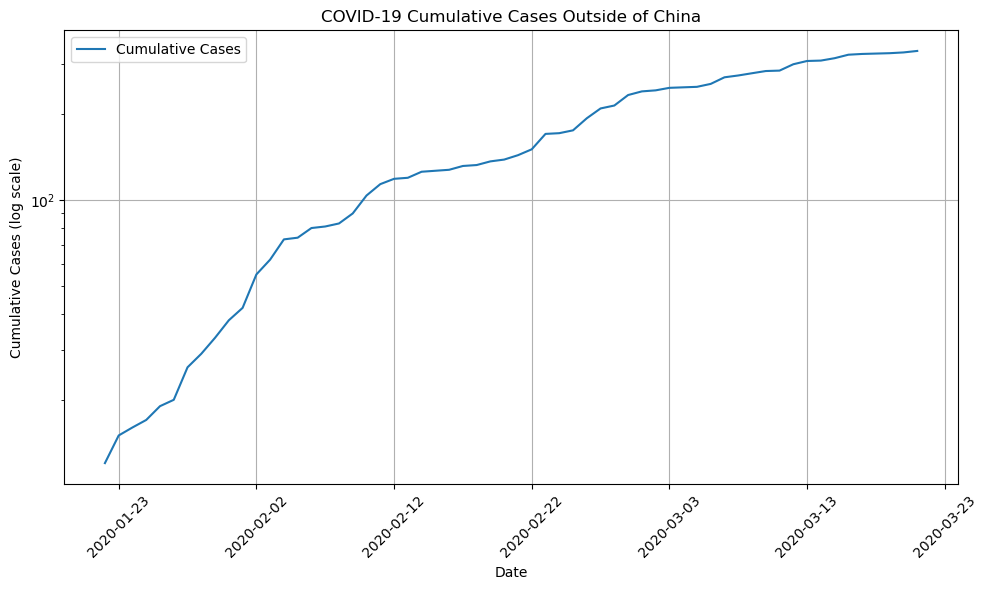

In [20]:
# Modify the plot to use a logarithmic scale on the y-axis
# Sample data: Replace these with your actual data
dates = pd.date_range('2020-01-22', periods=60, freq='D')
cases = np.random.geometric(p=0.2, size=60).cumsum()

plt.figure(figsize=(10, 6))

# Make sure to add a label here for the legend to pick up
plt.plot(dates, cases, label='Cumulative Cases')

# Setting y-axis to logarithmic scale
plt.yscale('log')

# Adding title and labels with the updated y-axis label to reflect the logarithmic scale
plt.title('COVID-19 Cumulative Cases Outside of China')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases (log scale)')

# Now the legend should work since there's a labeled plot
plt.legend()

plt.grid(True)

# Formatting date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

### B2.7 Which countries outside of China have been hit hardest?

With the logarithmic scale, we get a much closer fit to the data. From a data science point of view, a good fit is great news. Unfortunately, from a public health point of view, that means that cases of COVID-19 in the rest of the world are growing at an exponential rate, which is terrible news.

Not all countries are being affected by COVID-19 equally, and it would be helpful to know where in the world the problems are greatest. Let's find the countries outside of China with the most confirmed cases in our dataset.

In [21]:
# Run this to get the data for each country (confirmed_cases_by_country.csv)
df_confirmed_cases_by_country = pd.read_csv("confirmed_cases_by_country.csv")

In [22]:
df_confirmed_cases_by_country

# Filter out China
data_no_china = df_confirmed_cases_by_country[df_confirmed_cases_by_country['country'] != 'China']

# Group by country and sum cumulative cases
cum_cases_by_country = data_no_china.groupby('country')['cum_cases'].max()

# Sort the results in descending order
sorted_cum_cases = cum_cases_by_country.sort_values(ascending=False)

# Display the top countries with the most cumulative cases
print(sorted_cum_cases.head(10))

country
Italy             31506
Iran              16169
Spain             11748
Germany            9257
Korea, South       8320
France             7699
US                 6421
Switzerland        2700
United Kingdom     1960
Netherlands        1708
Name: cum_cases, dtype: int64


### B2.8 Plotting hardest hit countries as of Mid-March 2020

Even though the outbreak was first identified in China, there is only one country from East Asia (South Korea) in the above table. Four of the listed countries (France, Germany, Italy, and Spain) are in Europe and share borders. To get more context, we can plot these countries' confirmed cases over time.



In [23]:
# Read in the dataset from datasets/confirmed_cases_top7_outside_china.csv
df_confirmed_cases_top7_outside_china = pd.read_csv("confirmed_cases_top7_outside_china.csv")

In [24]:
df_confirmed_cases_top7_outside_china

,country,date,cum_cases
0,Germany,2020-02-18,16
1,Iran,2020-02-18,0
2,Italy,2020-02-18,3
3,"Korea, South",2020-02-18,31
4,Spain,2020-02-18,2
...,...,...,...
2025,US,2020-03-17,6387
2026,US,2020-03-17,6387
2027,US,2020-03-17,6388
2028,US,2020-03-17,6413


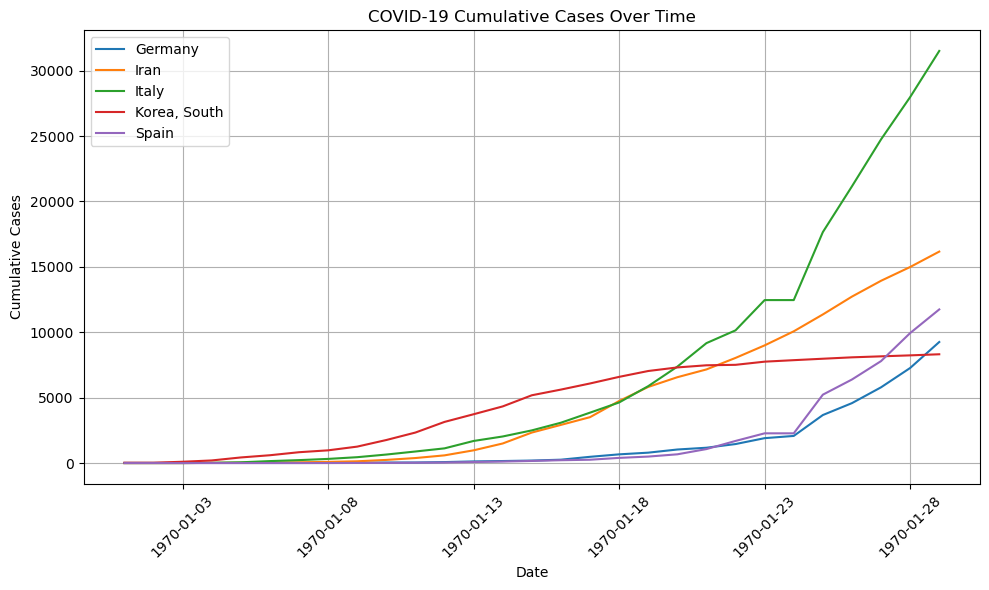

In [25]:
# Filter for the countries of interest
countries_of_interest = ['Germany', 'Iran', 'Italy', 'Korea, South', 'Spain']
filtered_data = df_confirmed_cases_top7_outside_china[df_confirmed_cases_top7_outside_china['country'].isin(countries_of_interest)]

# Plotting
plt.figure(figsize=(10, 6))

for country in countries_of_interest:
    country_data = filtered_data[filtered_data['country'] == country]
    plt.plot(country_data['date'], country_data['cum_cases'], label=country)

# Formatting the plot
plt.title('COVID-19 Cumulative Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.legend()
plt.grid(True)

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

* The objective of this coding question is to apply data cleaning and preprocessing, implement apriori algorithm, and generate frequent itemsets.
* You are provided with a CSV file containing transaction data, where each row represents an item purchased in a transaction. You are required to use only the 'Billno' and 'Itemname' column for this task.
* Your first task is to preprocess the dataset by grouping the items purchased for each bill number.
* Then, implement apriori algorithm to find frequent itemsets based on the given threshold values for support and confidence.


### Guidelines:



* Preprocessing:

    * Read the CSV file and load it into a suitable data structure.
    * Group the items purchased for each bill number.
    * Convert all items to lowercase to ensure consistency.

* Association Mining:

    * Use the apriori algorithm for finding association rules.
    * You are allowed to use apyori or mlxtend package for this task.
    * Implement the algorithm to find frequent itemsets using support=0.3 and confidence=0.5.

* Output:

    * Print or display the frequent itemsets satisfying the support and confidence thresholds.
    * Additionally, you have to display association rules generated by the algorithm.

### Your Implementation

In [26]:
## Read the dataset and display it ##
from apyori import apriori

df = pd.read_excel("MidTerm1_PartB3_Data.xlsx")

In [27]:
print(df.head())
print(df.info())

   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   Price  CustomerID         Country  
0   2.55     17850.0  United Kingdom  
1   3.39     17850.0  United Kingdom  
2   2.75     17850.0  United Kingdom  
3   3.39     17850.0  United Kingdom  
4   3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-

In [28]:
## Convert all the text to lowercase ##
df['Itemname'] = df['Itemname'].str.lower()
df['Country'] = df['Country'].str.lower()

In [29]:
## Remove unwanted columns and combine the transactions ##
grouped_items = df.groupby('BillNo')['Itemname'].apply(list).reset_index()
grouped = df.groupby('BillNo')['Itemname'].apply(lambda x: x.str.lower().dropna().unique().tolist()).reset_index(name='Items')


# Displaying the first entry for each group
print(grouped_items)

        BillNo                                           Itemname
0       536365  [white hanging heart t-light holder, white met...
1       536366  [hand warmer union jack, hand warmer red polka...
2       536367  [assorted colour bird ornament, poppy's playho...
3       536368  [jam making set with jars, red coat rack paris...
4       536369                         [bath building block word]
...        ...                                                ...
21658   581586  [large cake stand  hanging strawbery, set of 3...
21659   581587  [circus parade lunch box, plasters in tin circ...
21660  A563185                                  [adjust bad debt]
21661  A563186                                  [adjust bad debt]
21662  A563187                                  [adjust bad debt]

[21663 rows x 2 columns]


In [30]:
transactions = grouped_items['Itemname'].tolist()
preprocessed_transactions = []
for transaction in transactions:
    # Convert each item to string and filter out NaN values
    cleaned_transaction = [str(item) for item in transaction if pd.notna(item)]
    preprocessed_transactions.append(cleaned_transaction)

In [31]:
# Conduct Apriori algorithm
#rules = apriori(transactions, min_support=0.3, min_confidence=0.5, min_lift=3, max_length=2)
results = list(apriori(preprocessed_transactions, min_support=0.03, min_confidence=0.5))



In [32]:
# Output the results
for result in results:
    items = [x for x in result.items]
    print("\nItems:", items, "\nSupport:", result.support)

    for rule in result.ordered_statistics:
        if rule.confidence >= 0.5:  # Filter by confidence
            print("Rule: {} -> {}, Confidence: {}, Lift: {}".format(
                set(rule.items_base), set(rule.items_add), rule.confidence, rule.lift))


Items: ['roses regency teacup and saucer', 'green regency teacup and saucer'] 
Support: 0.033744172090661495
Rule: {'green regency teacup and saucer'} -> {'roses regency teacup and saucer'}, Confidence: 0.7497435897435898, Lift: 16.03326296605665
Rule: {'roses regency teacup and saucer'} -> {'green regency teacup and saucer'}, Confidence: 0.721618953603159, Lift: 16.03326296605665

Items: ['jumbo bag pink polkadot', 'jumbo bag red retrospot'] 
Support: 0.037806398005816366
Rule: {'jumbo bag pink polkadot'} -> {'jumbo bag red retrospot'}, Confidence: 0.676300578034682, Lift: 7.098207084285522

Items: ['jumbo bag red retrospot', 'jumbo shopper vintage red paisley'] 
Support: 0.0312052808936897
Rule: {'jumbo shopper vintage red paisley'} -> {'jumbo bag red retrospot'}, Confidence: 0.5797598627787307, Lift: 6.084950536519207

Items: ['jumbo bag red retrospot', 'jumbo storage bag suki'] 
Support: 0.0332825555093939
Rule: {'jumbo storage bag suki'} -> {'jumbo bag red retrospot'}, Confidence